Mandelbrot set implementation

In [2]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import qmc
import sympy

In [3]:
# def mandelbrot_check(c, max_iterations):
#     z = 0
#     for n in range(max_iterations):
#         z = z**2 + c
#     return abs(z) <= 2

def mandelbrot_iterations(c, max_iterations):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iterations:
        z = z**2 + c
        n += 1
    return n

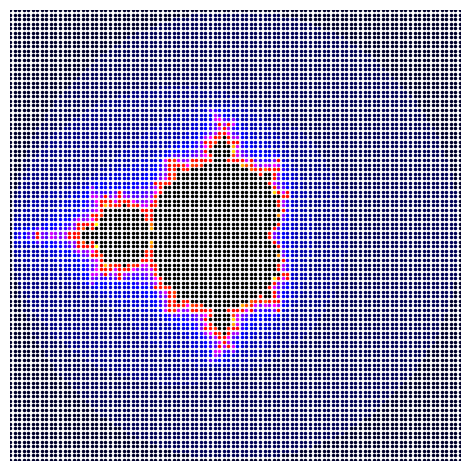

In [ ]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x, y)

complex_grid = x_grid - y_grid * 1j
max_iterations = 300

c_list_in_x = []
c_list_in_y = []

c_list_out_x = []
c_list_out_y = []
color_out = []
for c_row in complex_grid:
    for c in c_row:
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            c_list_in_x.append(c.real)
            c_list_in_y.append(c.imag)
        else:
            percentage_diverge = (n/max_iterations)*100
            c_list_out_x.append(c.real)
            c_list_out_y.append(c.imag)
            color_out.append(percentage_diverge)

for i in range(len(color_out)):
    if color_out[i] <= 2:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,color_out[i]/2))
    elif color_out[i] <= 4:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = ((color_out[i]-2)/2,0,1))
    else:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (1,(color_out[i]-4)/96,0))
    

plt.plot(c_list_in_x,c_list_in_y, marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,0))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [83]:
def area_mandelbrot(max_iter, samples, tot_area, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    area_s = []
    in_num = 0
    for s in range(1, samples):
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        c = x - y * 1j
        n =  mandelbrot_iterations(c, max_iter)
        if n == max_iter:
            in_num += 1
        area_s.append((in_num/samples)*tot_area)

    return area_s
    # return sum(area_s)/len(area_s)*tot_area

In [84]:
iterations = 300
samples = 300
tot_area = (2- (-2))* (2- (-2))

print(area_mandelbrot(iterations, samples, tot_area))

[0.0, 0.0, 0.0, 0.05333333333333334, 0.05333333333333334, 0.05333333333333334, 0.05333333333333334, 0.05333333333333334, 0.05333333333333334, 0.05333333333333334, 0.05333333333333334, 0.05333333333333334, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.16, 0.16, 0.16, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.32, 0.32, 0.37333333333333335, 0.37333333333333335, 0.37333333333333335, 0.4266666666666667, 0.4266666666666667, 0.48, 0.48,

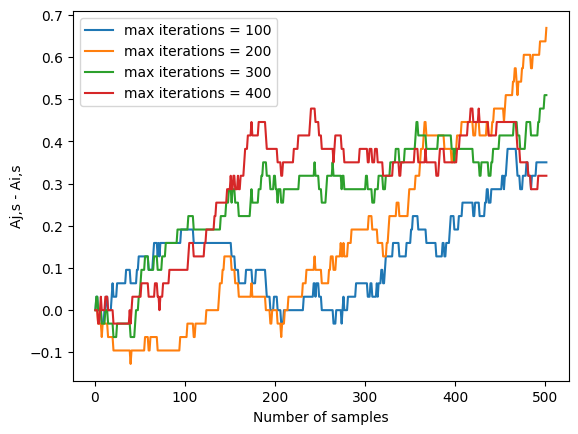

In [111]:
# iter = 302
# sample = 302

# max_iterations = 302
# y_s = []
# x_s = []
# for s in range(1, sample, 50):
#     print(f's: {s}')
#     y_s.append(area_mandelbrot(max_iterations, s, tot_A))
#     x_s.append(s)

# plt.plot(x_s, y_s)
# plt.title('Area for different sample sizes')
# plt.xlabel('Sample size')
# plt.show()


samples = 502
iterations = 502
tot_area = (2- (-2))* (2- (-2))

s_list = []
for s in range(1, samples):
    s_list.append(s)

y_i = []
max_list = []
for max_iterations in range(100, iterations, 100):
    max_list.append(max_iterations)
    y_i.append( area_mandelbrot(max_iterations, samples, tot_area))

for i_list in range(len(y_i)-1):
    area_list = []
    dif_list = []
    for i in range(len(y_i[i_list])):
        dif_list.append(y_i[i_list][i] - y_i[-1][i])
    plt.plot(s_list, dif_list, label = f"max iterations = {max_list[i_list]}")

plt.legend()
plt.ylabel('Aj,s - Ai,s')
plt.xlabel('Number of samples')
plt.show()

[0.0, 0.0, 3.2000000000000006, 1.2000000000000002, 0.9600000000000002, 1.3333333333333333, 0.6857142857142858, 1.2, 1.0666666666666669, 0.64, 1.0181818181818183, 1.2, 1.1076923076923078, 1.485714285714286, 0.64, 2.3, 1.411764705882353, 1.4222222222222223, 2.021052631578948, 1.28, 1.4476190476190478, 1.4545454545454546, 1.669565217391305, 1.8666666666666671, 1.6640000000000006, 1.7230769230769236, 2.0740740740740744, 1.3142857142857145, 1.3793103448275867, 1.1733333333333336, 1.7032258064516135, 1.7500000000000004, 1.6000000000000005, 1.270588235294118, 1.508571428571429, 1.6888888888888896, 1.3405405405405413, 1.6842105263157898, 1.4358974358974361, 1.6400000000000001, 1.3268292682926832, 1.7142857142857146, 1.4511627906976752, 1.5636363636363642, 1.2088888888888896, 1.3217391304347832, 1.361702127659575, 1.4000000000000004, 1.6653061224489796, 1.5680000000000005, 1.5999999999999999, 1.5384615384615385, 1.6603773584905654, 1.4518518518518522, 1.5127272727272727, 1.8, 1.684210526315789,

ValueError: x and y must have same first dimension, but have shapes (804,) and (1,)

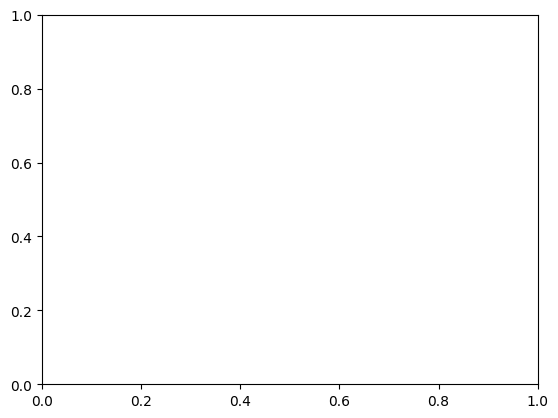

In [6]:
max_iterations = 300
tot_A = (2- (-2))* (2- (-2))
iter = 202
sample = 202

# accurate = 0
# s_good = 0
# i_good = 0

A_is = []
tot_samples = []
for i in range(10, iter, 50):
    for s in range(1, sample):
        A_is.append(area_mandelbrot(i, s, tot_A, max_iterations))
        tot_samples.append(s)

print(A_is)

for j in range(len(A_is)):
    plt.plot(tot_samples, A_is[j], label = f'iterations = {i}')
plt.legend()
plt.title('Area for different sample sizes')
plt.xlabel('Number of samples')
plt.ylabel('area estimation of the mandelbrot')
#         if accurate < A_is:
#             accurate = A_is
#             i_good = i
#             s_good = s

# print(f"i: {i_good}")
# print(f"s: {s_good}")
# print(f"accuracy: {accurate}")

# plt.plot(A_is, tot_samples)
# plt.title('Area for different sample sizes')
# plt.xlabel('Accuracy of area calc')
plt.show()


In [ ]:
def hypercube_area_mandelbrot(samples, tot_area, max_iterations, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    for s in range(1, samples):
        sampler = qmc.LatinHypercube(d = 2)
        sample = sampler.random(n = s)
        l_bounds = [xmin, ymin]
        u_bounds = [xmax, ymax]
        sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
        x_list = sample_scaled[:, 0]
        y_list = sample_scaled[:, 1]
        # x_list = xmin + sample[:, 0] * (xmax - xmin)
        # y_list = ymin + sample[:, 1] * (ymax - ymin)
    
    area_s = []
    for ax in range(len(x_list)):
        in_num = 0
        c = x_list[ax] - y_list[ax] * 1j
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            in_num += 1
        area_s.append(in_num)

    return sum(area_s)/len(area_s)*tot_area

In [ ]:
def ortho_area_mandelbrot(samples, tot_area, max_iterations, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    # for s in range(4, samples):
    for s in sympy.primerange(0, np.sqrt(samples)):
        s_square = s**2
        if s_square < samples:
            sampler = qmc.LatinHypercube(d = 2, strength = 2)
            sample = sampler.random(n = s_square)
            l_bounds = [xmin, ymin]
            u_bounds = [xmax, ymax]
            sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
            x_list = sample_scaled[:, 0]
            y_list = sample_scaled[:, 1]
        # x_list = xmin + sample[:, 0] * (xmax - xmin)
        # y_list = ymin + sample[:, 1] * (ymax - ymin)
    
    area_s = []
    for ax in range(len(x_list)):
        in_num = 0
        c = x_list[ax] - y_list[ax] * 1j
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            in_num += 1
        area_s.append(in_num)

    return sum(area_s)/len(area_s)*tot_area

In [ ]:
max_iterations = 300

i = 50
s = 200
tot_A = (2- (-2))* (2- (-2))

print(area_mandelbrot(i, s, tot_A, max_iterations))
print(hypercube_area_mandelbrot(s, tot_A, max_iterations))
print(ortho_area_mandelbrot(s, tot_A, max_iterations))


1.7071999999999985
1.92964824120603
1.514792899408284


hoe heet wat? is samples, een groep punten aka iterations of is samples 1 en voor meerdere iterations dus dat is dan de groep.


is de i niet gewoon max_iterations die we moeten aanpassen? Ja tis max_iterations
weergave, max_iter vast zetten en samples veranderen en dan andersom.